<a href="https://colab.research.google.com/github/Cyber-Labs/workshop-files/blob/master/Machine%20Learning'19/Cyber_Labs_Machine_Learning_Workshop_2019_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workshop - CyberLabs

# Setup
Just run the following cell. It will import all the required things for the session.

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha
!wget https://tlgur.com/d/4xrmPJwG -O data_draft.csv 
!wget https://tlgur.com/d/4RX2BBeG -O utils.py
from utils import *

--2019-08-28 08:00:59--  https://tlgur.com/d/4xrmPJwG
Resolving tlgur.com (tlgur.com)... 104.27.153.113, 104.27.152.113, 2606:4700:30::681b:9971, ...
Connecting to tlgur.com (tlgur.com)|104.27.153.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 340184 (332K) [text/csv]
Saving to: ‘data_draft.csv’

data_draft.csv      100%[===================>] 332.21K  --.-KB/s    in 0.02s   

2019-08-28 08:00:59 (14.3 MB/s) - ‘data_draft.csv’ saved [340184/340184]

--2019-08-28 08:01:01--  https://tlgur.com/d/4RX2BBeG
Resolving tlgur.com (tlgur.com)... 104.27.153.113, 104.27.152.113, 2606:4700:30::681b:9971, ...
Connecting to tlgur.com (tlgur.com)|104.27.153.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5376 (5.2K) [text/x-python]
Saving to: ‘utils.py’

utils.py            100%[===================>]   5.25K  --.-KB/s    in 0s      

2019-08-28 08:01:01 (75.6 MB/s) - ‘utils.py’ saved [5376/5376]



## Generate Our Own Data 

Now we will choose a function y = 
f(x).


###__*Let  y = 3x+ 5*__



Our data will be some random values of *x* in array *X* and the corresponding *y's* in *Y*.

On these data we will perform __Linear Regression.__
Our model will learn the *line.*


In [0]:
import numpy as np
np.random.seed(0)

In [0]:
m = 30   # no of examples
t = 20   # no_of_test_examples

# Generate numpy 1-Dimensional array filled with random values.
# 1-D array is also called 'vector'

X = np.random.rand(m) * 10 - 5  # Used to generate 30 random values between -5 and +5
X_test = np.random.rand(t) * 10 - 5  


In [0]:
print(X)

[ 0.48813504  2.15189366  1.02763376  0.44883183 -0.76345201  1.45894113
 -0.62412789  3.91773001  4.63662761 -1.16558481  2.91725038  0.2889492
  0.68044561  4.25596638 -4.28963942 -4.128707   -4.79781603  3.32619846
  2.78156751  3.70012148  4.78618342  2.99158564 -0.38520638  2.80529176
 -3.81725574  1.39921021 -3.56646713  4.44668917  0.21848322 -0.8533806 ]


In [0]:
print(X * 2)

[ 0.97627008  4.30378733  2.05526752  0.89766366 -1.52690401  2.91788226
 -1.24825577  7.83546002  9.27325521 -2.33116962  5.83450076  0.5778984
  1.36089122  8.51193277 -8.57927884 -8.25741401 -9.59563205  6.65239691
  5.56313502  7.40024296  9.57236684  5.98317128 -0.77041275  5.61058353
 -7.63451148  2.79842043 -7.13293425  8.89337834  0.43696644 -1.7067612 ]


In [0]:
print(X + 2)

[ 2.48813504  4.15189366  3.02763376  2.44883183  1.23654799  3.45894113
  1.37587211  5.91773001  6.63662761  0.83441519  4.91725038  2.2889492
  2.68044561  6.25596638 -2.28963942 -2.128707   -2.79781603  5.32619846
  4.78156751  5.70012148  6.78618342  4.99158564  1.61479362  4.80529176
 -1.81725574  3.39921021 -1.56646713  6.44668917  2.21848322  1.1466194 ]


In [0]:
print(X_test)

[-2.35444388  2.74233689 -0.43849668  0.68433949 -4.812102    1.17635497
  1.12095723  1.16933997  4.43748079  1.81820299 -1.40492099 -0.62968046
  1.97631196 -4.39774528  1.66766715  1.7063787  -2.89617439 -3.71073702
 -1.84571649 -1.36289229]


### Our function is
\begin{equation*}
y = 3x+ 5
\end{equation*}

In [0]:
# Generate Y as per the function
################ START OF CODE ######################

Y = 3*X + 5# Your code here

################ END OF CODE  #######################

Note that __Y__ is vector or a 1-D array

In [0]:
print(Y)

[ 6.46440512 11.45568099  8.08290128  6.34649549  2.70964398  9.37682339
  3.12761634 16.75319002 18.90988282  1.50324556 13.75175114  5.86684759
  7.04133683 17.76789915 -7.86891825 -7.38612101 -9.39344808 14.97859537
 13.34470253 16.10036445 19.35855027 13.97475693  3.84438087 13.41587529
 -6.45176722  9.19763064 -5.69940138 18.34006751  5.65544965  2.4398582 ]


*__Let's visualize our data__*

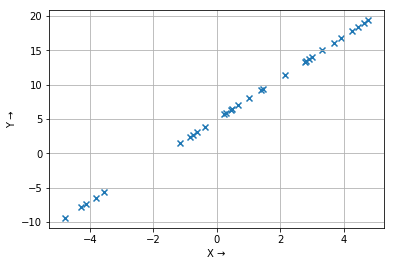

In [0]:
# No need to worry about following code snippet, it just plots the data
import matplotlib.pyplot as plt
plt.grid(True)
plt.scatter(X,Y, marker = "x")
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()



We will assume our __*hypothesis*__ to be 

\begin{equation*}
y =WX  + b
\end{equation*}

where we have to *learn* the values of W and b.

- $b$ is the intercept or the bias
- $W$ is the coefficient for x for the weight.

We will train a model with the data we had just generated.

# Gradient Descent


### We will do gradient descent by updating the values of W and b at each iteration of our training loop.

####For each iteration,

- 1. Perform forward pass ( prediting values from our random weights)
    \begin{equation*}
\hat{y} = f (x)
\end{equation*}


- 2. Compute loss ( Mean Squared Error )
#### Mean squared error
\begin{equation*}
J = \frac{1} {2 m}  \sum_{}  ( \hat{y} -Y)^{2}
\end{equation*}
$m$ - Number of training examples


- 3. Calculate gradient of *weight and bias* with respect to our loss

\begin{equation*}\frac{dLoss} {dW} =  \end{equation*}

\begin{equation*} \frac{dLoss} {db}= \end{equation*}


- 4. Update the weight and bias


\begin{equation*}
W := W -   \alpha \frac{dLoss} {dW}
\end{equation*}

\begin{equation*}
b := b -   \alpha \frac{dLoss} {db}
\end{equation*}

$\alpha$ is the learning rate.

In [0]:
# Intialize W and b with any values. 
W = 16
b = -4

The following cell has some helper functions. Just run it. Don't worry about this code now.

In [0]:
def plot(X, Y, X_test, Y_test):
    plt.scatter( X, Y, c='r', marker='x' )
    plt.plot(X_test, Y_test , '-o')
    plt.xlabel('X →')
    plt.ylabel('Y →')
    plt.show()
    

\begin{equation*}
y_{pred} = Wx+ b
\end{equation*}

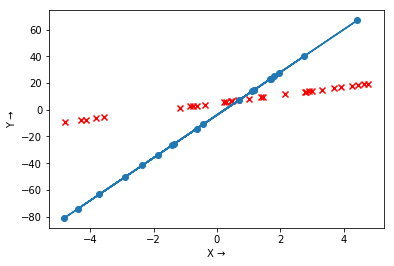

In [0]:
Y_test = W * X_test + b #Your code here
plot(X, Y, X_test, Y_test)

In [0]:
def train_lr(no_of_iterations, learning_rate, X, Y, X_test):
    ''' 
    no_of_iterations : number of times to run training 
    learning rate    : alpha 
    X                : training data 
    Y                : labels
    X_test           : test data 
    '''
 
    W = 16
    b = -4

    m_train = len(X)
    m_test  = len(X_test)
    # loop for iterations
    for t in range(no_of_iterations):

        # 1. FORWARD PASS - predicting answer from our random weight and bias.
        '''

        W - weight
        b - bias term
        X - vector of x
        y_pred - predicted answers
        
        '''
        ################## START OF CODE ########################
        
        Y_pred = W*X + b # Your code here
        
        ################## END OF CODE ##########################
        
        # 2. LOSS  - how much our predicted answer differ from actual answer.
        '''
        y_pred - predicted answers
        Y - true answer
        m - number of training examples
        Use np.sum( vector_name ) to sum out values in the vector
        '''
        ################### START OF CODE #######################
        
        loss = np.sum((Y_pred-Y)**2)/m_train # Your code here
        
        ################## END OF CODE  #########################

        # 3. BACKWARD PASS - Find gradients of our weights with respect to the loss
        '''
        grad_w - dw/dloss
        grad_b - db/dloss
        b - bias term
        x - vector of x
        y_pred - predicted answer
        m - number of training examples
        Use np.sum( vector_name ) to sum out values in the vector
        '''
        #################### START OF CODE #######################
        
        grad_w = np.sum((Y_pred-Y)*X)/m_train # Your code here
        grad_b = np.sum(Y_pred-Y)/m_train   # Your code here
        
        #################### END OF CODE #########################

        # 4. UPDATE WEIGHTS
        '''
        grad_w - dw/dloss
        grad_b - db/dloss
        b - bias term
        x - vector of x
        y_pred - predicted answer
        '''
        ################ START OF CODE  ##########################
        
        W  = W - learning_rate * grad_w # Your code here
        b  = b - learning_rate * grad_b # Your code here
        
        ################# END OF CODE ###########################

        ''' 
        Let's see how our model performs on the test set 
        X_test = test examples
        Y_test = labels predicted by our model

        '''

        Y_test = W*X_test + b #Your code here 

        # plotting line
        if t%10 == 0 : 
            print(f"After {t} iteration:")
            print("Loss: ",loss)
            plot(X, Y, X_test, Y_test)
    return W,b

After 0 iteration:
Loss:  1328.9962629572776


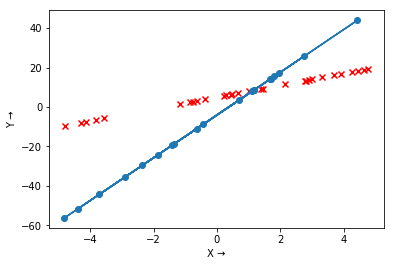

After 10 iteration:
Loss:  38.28277680562829


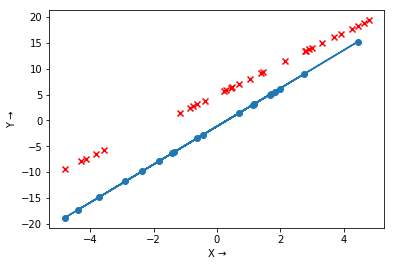

After 20 iteration:
Loss:  15.024924200658482


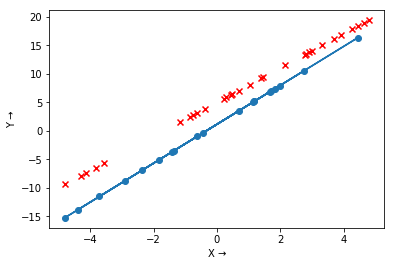

After 30 iteration:
Loss:  5.899376078166741


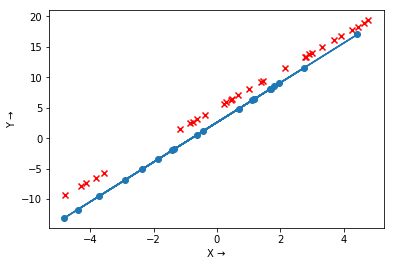

After 40 iteration:
Loss:  2.316327067379029


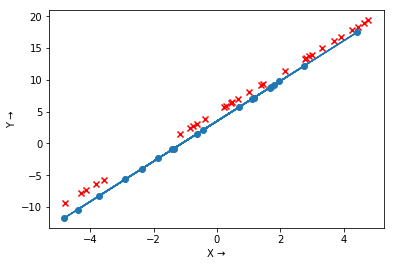

After 50 iteration:
Loss:  0.9094811064736606


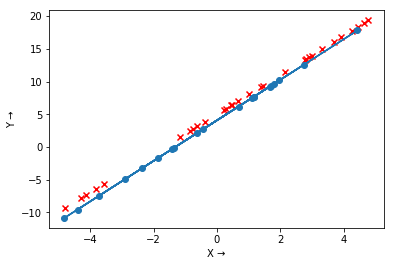

After 60 iteration:
Loss:  0.3570980517740507


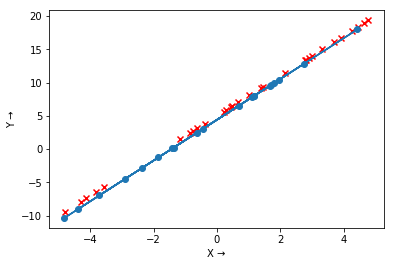

After 70 iteration:
Loss:  0.14021073958892244


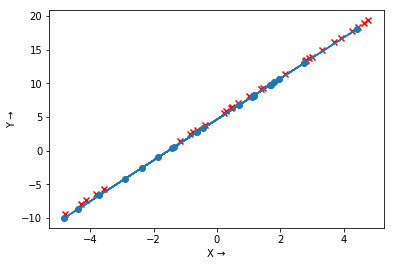

In [0]:
W, b = train_lr(no_of_iterations=71, learning_rate=5e-2, X=X, Y=Y, X_test=X_test)

#### Notice that loss must be decreasing gradually.

###*Let us have a look on predicted values and original values*

Just run the following cell

In [0]:
import pandas as pd
y = X_test * W + b
y_orig = X_test*3 + 5
df = pd.DataFrame(columns=['X_test','Predicted_target', 'Original_target'])
df['X_test'] = X_test
df['Predicted_target'] = y
df['Original_target'] = y_orig
df.head() 

,X_test,Predicted_target,Original_target
0,-2.354444,-2.528634,-2.063332
1,2.742337,12.964121,13.227011
2,-0.438497,3.295297,3.684510
3,0.684339,6.708397,7.053018
4,-4.812102,-9.999212,-9.436306


# Let's apply linear regression on a real world dataset.


We got weather reports of time during World War II. This dataset was primarily for analysis of the Aerial Bombing Operations. The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

It was found from these dataset that there was a high correlation between the minimum and maximum temperature. One can be predicted from other by simple __linear regression__.

###So we will traing a model by linear regression and try to predict maximum temperature from minmum temperature.

# Getting Data

In [0]:
data = read_csv('data_draft.csv')

Let us take a look at the data first

In [0]:
data.head(10)

,MinTemp,MaxTemp
0,6.666667,11.111111
1,17.777778,27.777778
2,22.777778,29.444444
3,10.000000,18.888889
4,26.666667,30.555556
5,24.444444,34.444444
6,17.222222,25.555556
7,8.888889,17.222222
8,23.333333,28.333333
9,24.444444,29.444444


How much data points do we have?

In [0]:
len(data)

15000

In [0]:
X_mintemp = data['MinTemp']
Y_maxtemp = data['MaxTemp']

## Splitting the data into train and test set


We will have 

- X -> training data points ( MinTemp )

- Y -> training data labels ( MaxTemp )

- X_test -> test data points ( MinTemp)

- Y_test -> test data labels ( MaxTemp ) - we will use this to see how well our model has performed


In [0]:
# Used for splitting the data into train and test automatically
fraction = 0.2    # fraction in of total data you want in test data
X, X_test, Y, Y_true = train_test_split(X_mintemp , Y_maxtemp , test_size= fraction , random_state=23)

*__Let's visualize our training data__*

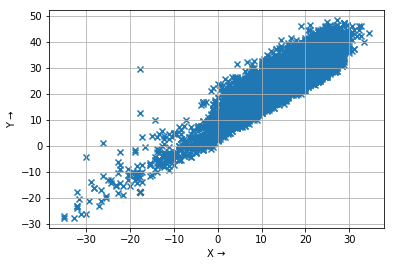

In [0]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.scatter(X,Y, marker = "x")
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()


# If you dont' understand the above code, don't worry about it.



Again, assuming our  __*hypothesis*__ to be
\begin{equation*}
y =W*X  + b
\end{equation*}

where we have to *learn* the values of W and b.

- $b$ is the intercept or the bias
- $W$ is the coefficient for x also called the weight parameter.

We will train a model with the X and Y

After 0 iteration:
Loss:  80611.65794175412


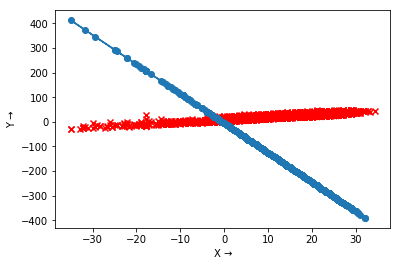

After 10 iteration:
Loss:  25782.268148740757


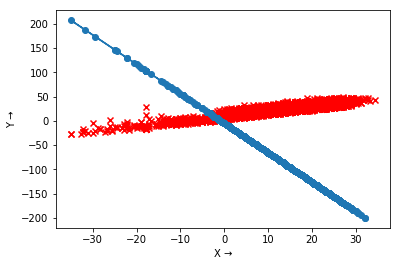

After 20 iteration:
Loss:  8272.339158721246


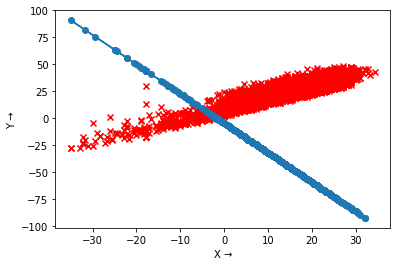

After 30 iteration:
Loss:  2680.152211604951


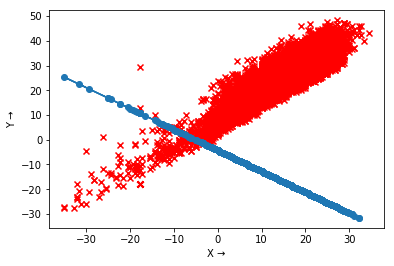

After 40 iteration:
Loss:  893.8295826572598


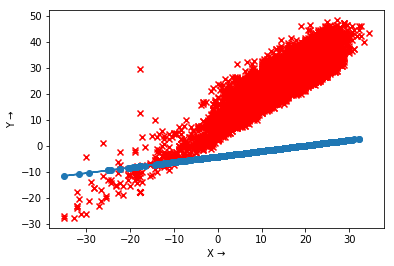

After 50 iteration:
Loss:  322.89447539172926


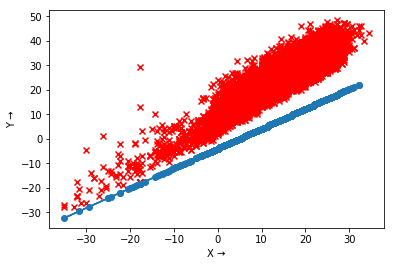

After 60 iteration:
Loss:  140.0944157905267


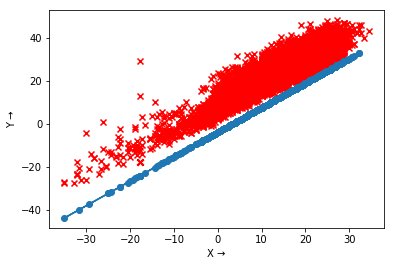

After 70 iteration:
Loss:  81.25142173138207


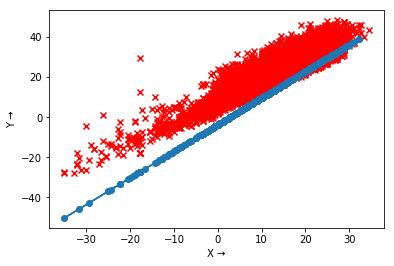

After 80 iteration:
Loss:  62.00177680674669


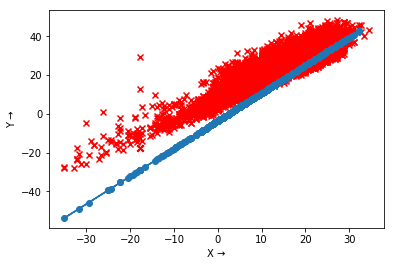

After 90 iteration:
Loss:  55.40431116315149


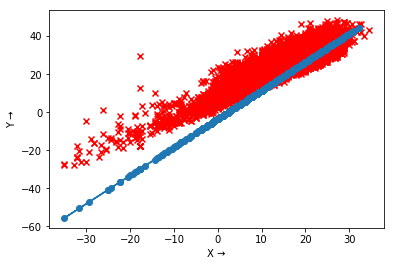

After 100 iteration:
Loss:  52.855383257746965


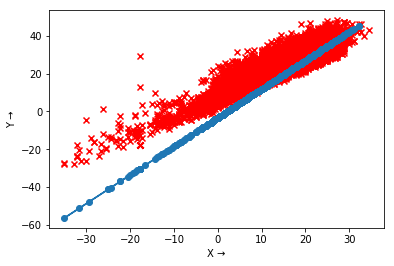

After 110 iteration:
Loss:  51.60732746490198


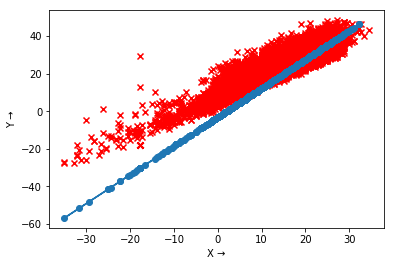

After 120 iteration:
Loss:  50.78254954178653


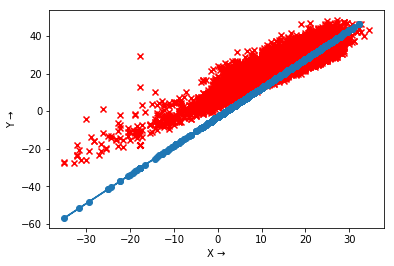

After 130 iteration:
Loss:  50.10065328194299


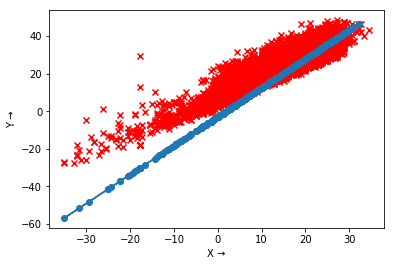

After 140 iteration:
Loss:  49.471956448895675


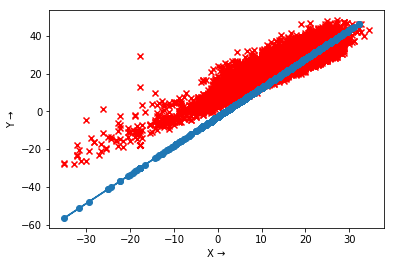

After 150 iteration:
Loss:  48.86768262467628


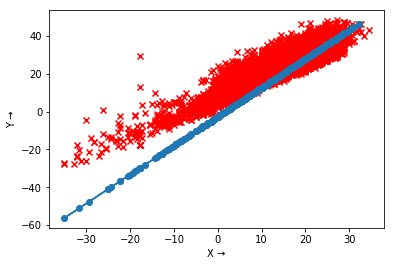

After 160 iteration:
Loss:  48.2785077554239


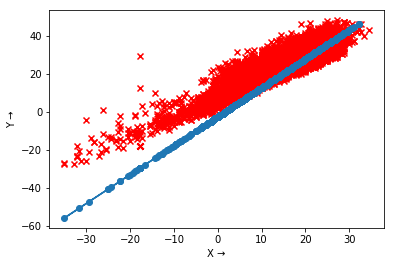

After 170 iteration:
Loss:  47.70132220917261


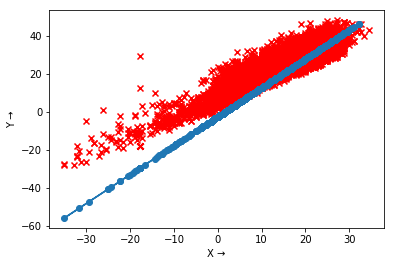

After 180 iteration:
Loss:  47.13500327906758


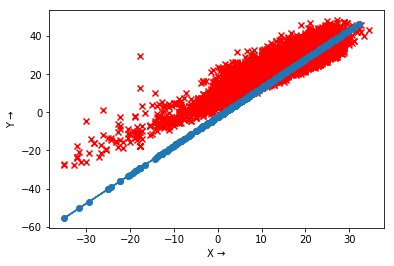

After 190 iteration:
Loss:  46.579065115898864


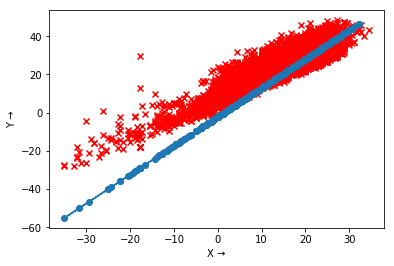

After 200 iteration:
Loss:  46.03322755019487


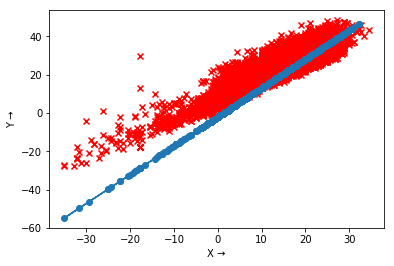

After 210 iteration:
Loss:  45.49727835662828


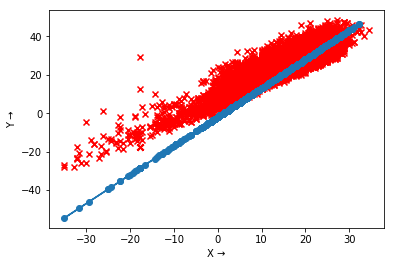

After 220 iteration:
Loss:  44.97102922811476


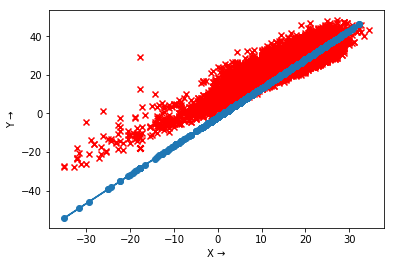

After 230 iteration:
Loss:  44.454301676246864


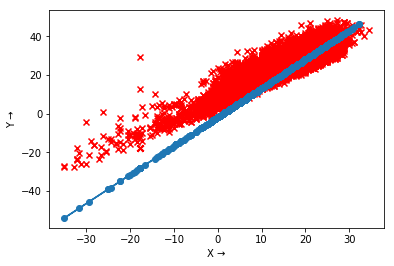

After 240 iteration:
Loss:  43.946922489240066


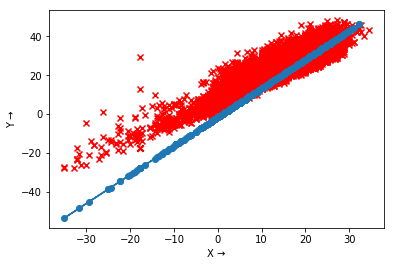

After 250 iteration:
Loss:  43.448722242722816


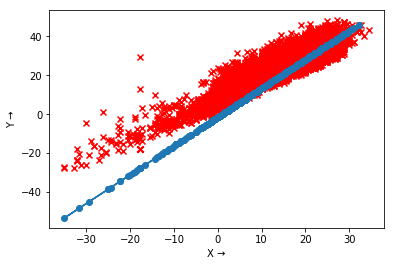

After 260 iteration:
Loss:  42.959534786134114


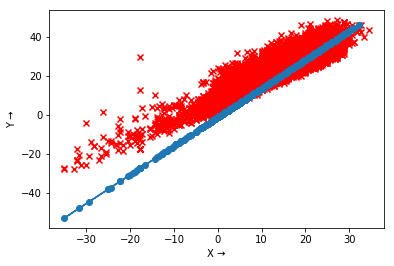

After 270 iteration:
Loss:  42.4791970413628


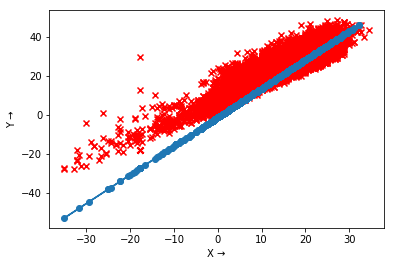

After 280 iteration:
Loss:  42.007548901775145


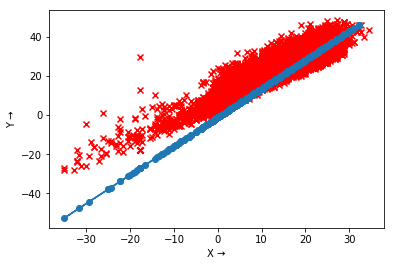

After 290 iteration:
Loss:  41.54443316396385


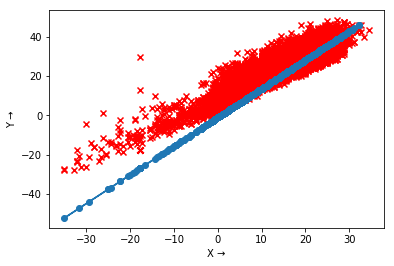

After 300 iteration:
Loss:  41.08969547059822


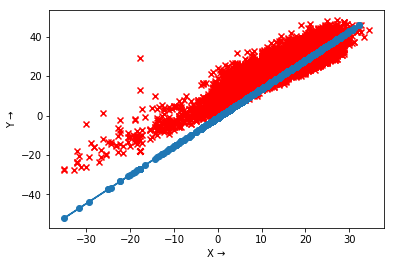

After 310 iteration:
Loss:  40.64318425745858


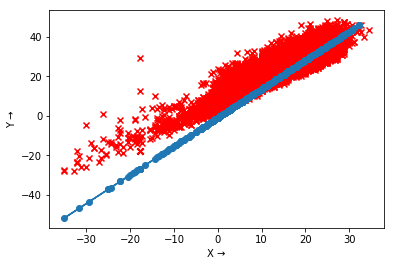

After 320 iteration:
Loss:  40.204750702435184


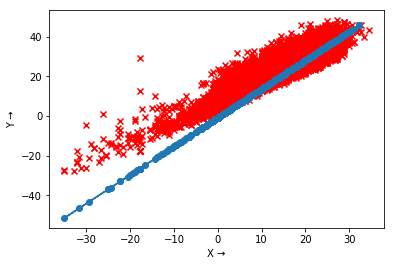

After 330 iteration:
Loss:  39.77424867577105


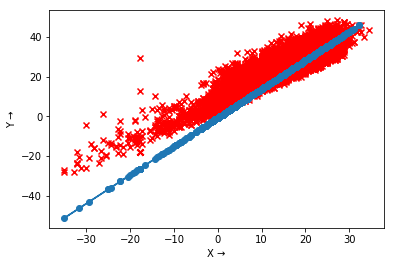

After 340 iteration:
Loss:  39.35153469130752


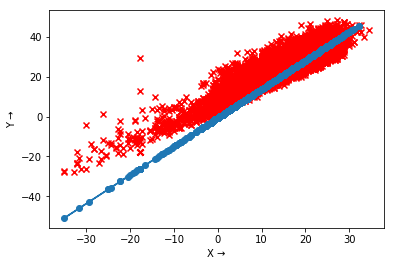

After 350 iteration:
Loss:  38.936467858644605


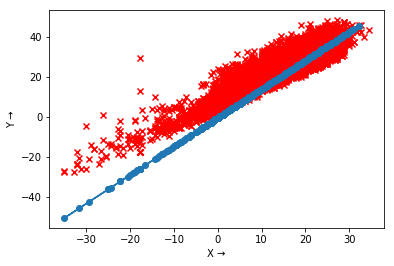

After 360 iteration:
Loss:  38.52890983617722


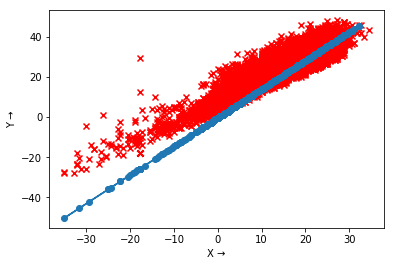

After 370 iteration:
Loss:  38.12872478498434


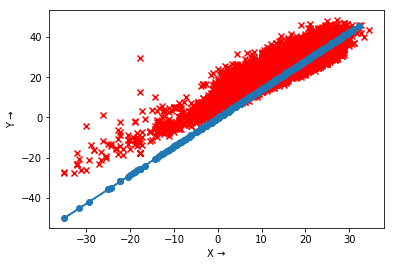

After 380 iteration:
Loss:  37.73577932355351


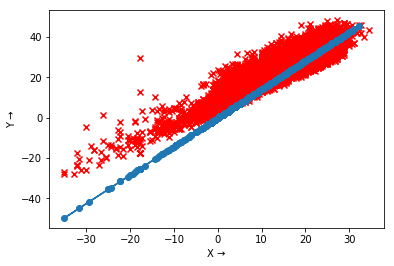

After 390 iteration:
Loss:  37.349942483324604


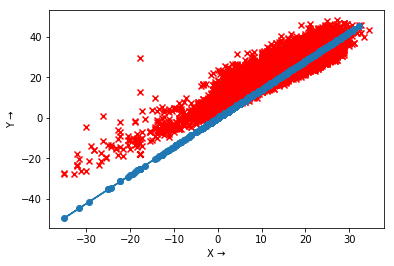

After 400 iteration:
Loss:  36.97108566503802


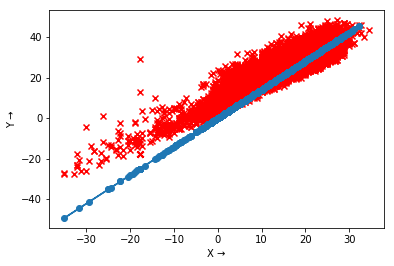

After 410 iteration:
Loss:  36.59908259587264


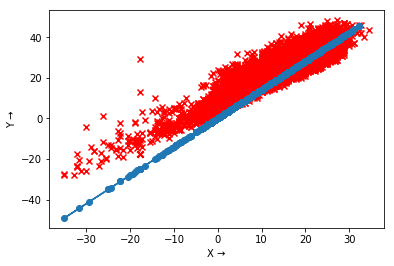

After 420 iteration:
Loss:  36.23380928735907


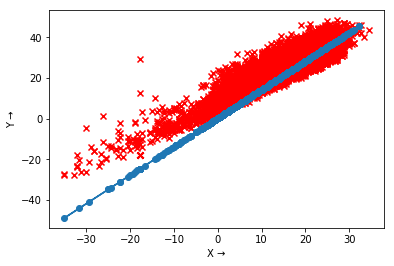

After 430 iteration:
Loss:  35.87514399405436


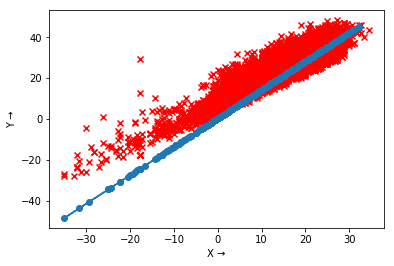

After 440 iteration:
Loss:  35.52296717296433


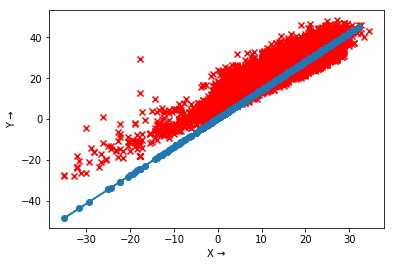

After 450 iteration:
Loss:  35.17716144369985


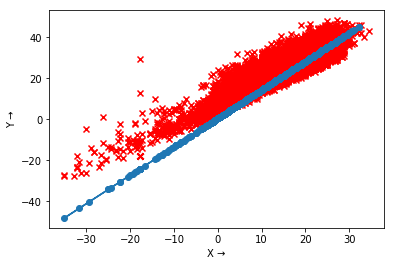

After 460 iteration:
Loss:  34.83761154935415


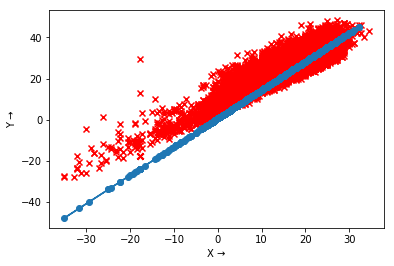

After 470 iteration:
Loss:  34.50420431808762


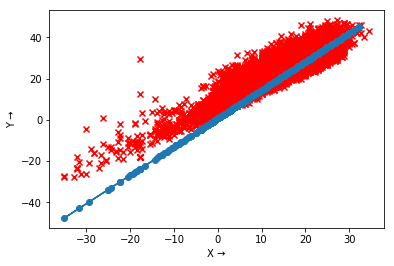

After 480 iteration:
Loss:  34.17682862540767


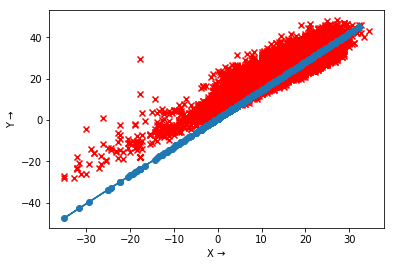

After 490 iteration:
Loss:  33.85537535713109


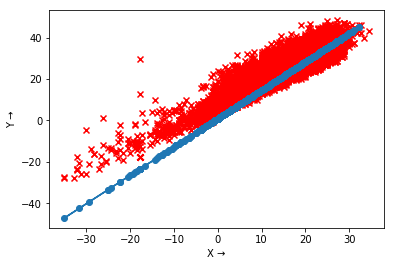

After 500 iteration:
Loss:  33.53973737301628


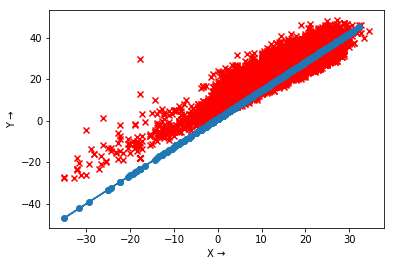

In [0]:
## TRY DIFFERENT LEARNING RATE 
W,b = train_lr(no_of_iterations=501, learning_rate=5e-3, X=X, Y=Y, X_test=X_test)

#Lets take a relatively complex problem,
\begin{equation*}
y = f (x)
\end{equation*}

- __X__ -----> incomplete images of handwritten digits

- __Y__ -----> completed images of X


Now we will you use the training data to make the computer learn function __f__
(also called as model) with suitable loss fuNction and learning rate.

Once the function is ready , we can give any incomplete image of digit and it will complete it.

Let's give it a go.....

### Autoencoder

In [0]:
(training, _), (test, _) = tf.keras.datasets.mnist.load_data()
training = training[..., None]
test = test[..., None]

In [0]:
x_img_train = []
y_img_train = []
for img in training:
  img = img/255.
  y_img_train.append(img)
  x_img_train.append(randomtozero(img.copy()))
x_img_train = np.array(x_img_train)
y_img_train = np.array(y_img_train)
x_img_test = []
y_img_test = []
for img in test:
  img = img/255.
  y_img_test.append(img)
  x_img_test.append(randomtozero(img.copy()))
x_img_test = np.array(x_img_test)
y_img_test = np.array(y_img_test)


print("Training shape X:",x_img_train.shape)
print("Training shape y:",y_img_train.shape)
print("Test shape x:",x_img_test.shape)
print("Test shape y:",y_img_test.shape)

Training shape X: (60000, 28, 28, 1)
Training shape y: (60000, 28, 28, 1)
Test shape x: (10000, 28, 28, 1)
Test shape y: (10000, 28, 28, 1)


In [0]:
training_dataset_x = tf.data.Dataset.from_tensor_slices(x_img_train).batch(128)
training_dataset_y = tf.data.Dataset.from_tensor_slices(y_img_train).batch(128)

Done: 1 in 14.291107416152954 sec
Training Loss 0.09494329363863949
Validation Loss 0.09642062284307809
Done: 2 in 7.5135040283203125 sec
Training Loss 0.09492683722431447
Validation Loss 0.09640405621456871
Done: 3 in 7.768398284912109 sec
Training Loss 0.09489921814755833
Validation Loss 0.09637597971750846
Done: 4 in 7.529582977294922 sec
Training Loss 0.08823325714167203
Validation Loss 0.08942847826688108
Done: 5 in 7.5144944190979 sec
Training Loss 0.04428107180070343
Validation Loss 0.0440906828661051


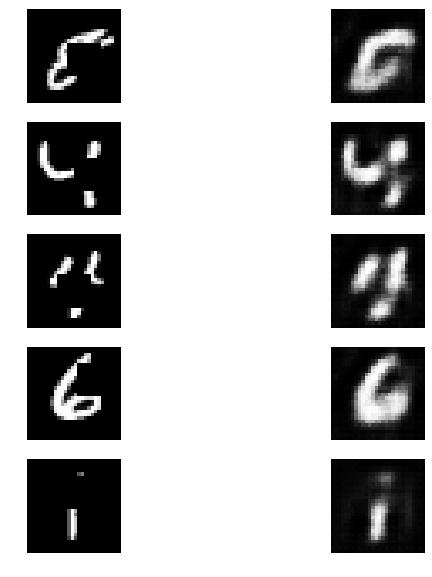

Done: 6 in 7.544039964675903 sec
Training Loss 0.028922628906522366
Validation Loss 0.028915159967241283
Done: 7 in 7.516661882400513 sec
Training Loss 0.026329166218461524
Validation Loss 0.026391147665486815
Done: 8 in 7.462242364883423 sec
Training Loss 0.02370366077925214
Validation Loss 0.02369967341952357
Done: 9 in 7.513674259185791 sec
Training Loss 0.022541044673296328
Validation Loss 0.02252503361119474
Done: 10 in 7.4381914138793945 sec
Training Loss 0.02161285018896177
Validation Loss 0.021558779185831843


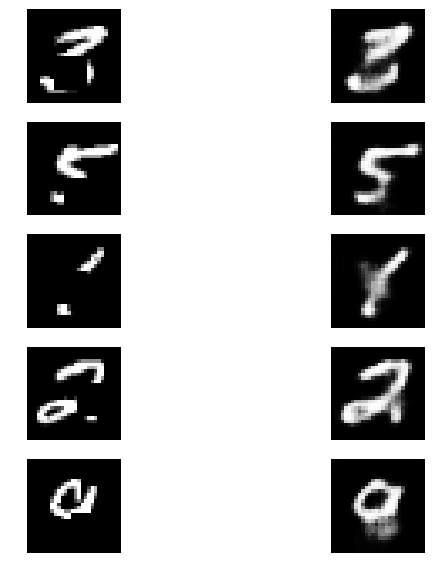

Done: 11 in 7.540236234664917 sec
Training Loss 0.020604458211558943
Validation Loss 0.02051980837295542
Done: 12 in 7.4910266399383545 sec
Training Loss 0.019884164348428515
Validation Loss 0.01978524235169183
Done: 13 in 7.535295486450195 sec
Training Loss 0.019279483464392237
Validation Loss 0.01918711576184546
Done: 14 in 7.536726713180542 sec
Training Loss 0.018688054696756162
Validation Loss 0.01860070546567115
Done: 15 in 7.532641649246216 sec
Training Loss 0.018249328588030418
Validation Loss 0.018159838125882743


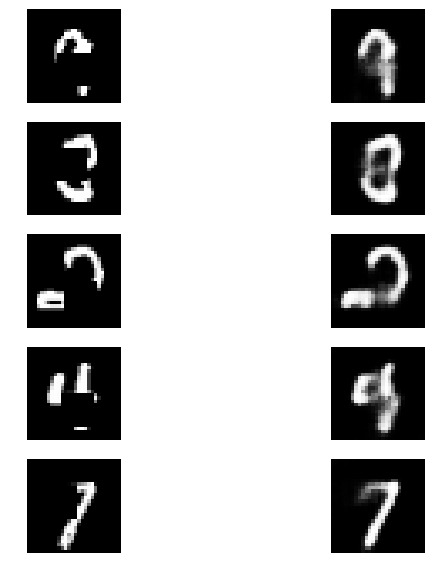

Done: 16 in 7.535107135772705 sec
Training Loss 0.017876362146502234
Validation Loss 0.017785211866188047
Done: 17 in 7.568285942077637 sec
Training Loss 0.017529214534797475
Validation Loss 0.0174360784976669
Done: 18 in 7.504276752471924 sec
Training Loss 0.017205847902995654
Validation Loss 0.017113731511808904
Done: 19 in 7.53905463218689 sec
Training Loss 0.016898876160116365
Validation Loss 0.016812394058394776
Done: 20 in 7.576431035995483 sec
Training Loss 0.016642488374160096
Validation Loss 0.016558980649350897


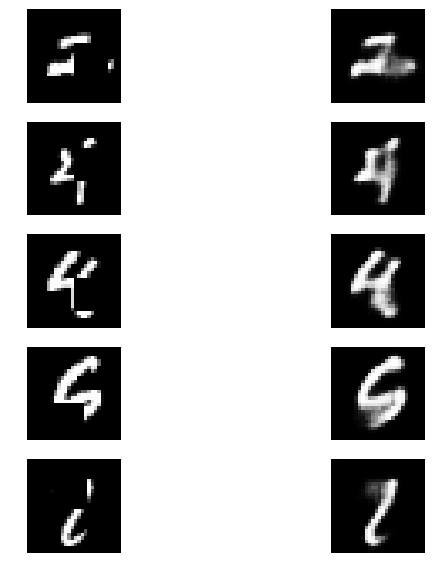

Done: 21 in 7.545001745223999 sec
Training Loss 0.016405749278275577
Validation Loss 0.016330733528487223
Done: 22 in 7.548704624176025 sec
Training Loss 0.016197433472901503
Validation Loss 0.016124718528306364
Done: 23 in 7.538194894790649 sec
Training Loss 0.015976229161894208
Validation Loss 0.015900876896444625
Done: 24 in 7.598786115646362 sec
Training Loss 0.015765468623016136
Validation Loss 0.015690119300456322
Done: 25 in 7.5354156494140625 sec
Training Loss 0.01558817967622071
Validation Loss 0.015512504241018209


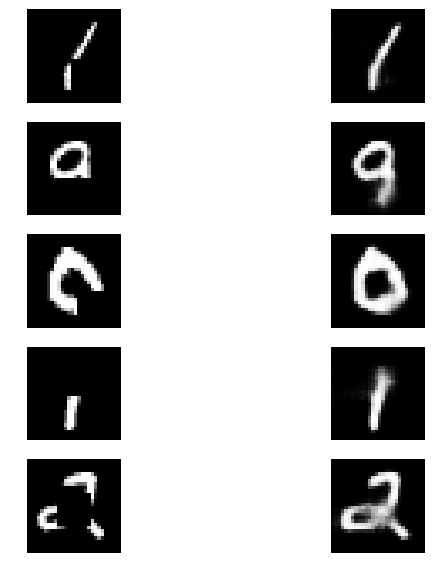

Done: 26 in 7.559882164001465 sec
Training Loss 0.015453329067695679
Validation Loss 0.015380358243217561
Done: 27 in 7.536823749542236 sec
Training Loss 0.015308167670455463
Validation Loss 0.015238790610794636
Done: 28 in 7.654256343841553 sec
Training Loss 0.015150263385008765
Validation Loss 0.0150813980240669
Done: 29 in 7.559612035751343 sec
Training Loss 0.01503645323982958
Validation Loss 0.014967967946522356
Done: 30 in 7.570769309997559 sec
Training Loss 0.01491487767877699
Validation Loss 0.01484284324444815


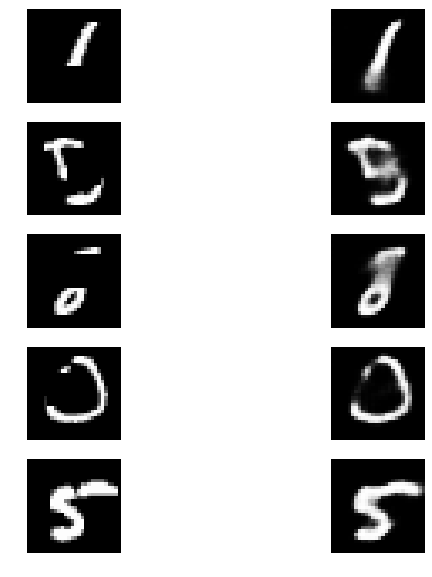

Done: 31 in 7.513960838317871 sec
Training Loss 0.014815447898202105
Validation Loss 0.01474594031402588
Done: 32 in 7.497596025466919 sec
Training Loss 0.014722191884883431
Validation Loss 0.014654050623718995
Done: 33 in 7.490069389343262 sec
Training Loss 0.014631822847688894
Validation Loss 0.014563601224095826
Done: 34 in 7.48432993888855 sec
Training Loss 0.014546396925501685
Validation Loss 0.014478969361008957
Done: 35 in 7.515257835388184 sec
Training Loss 0.014450328716097709
Validation Loss 0.014377618197149692


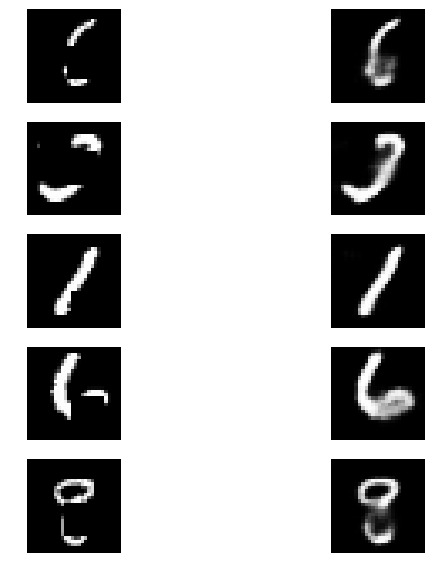

In [0]:
import matplotlib.pyplot as plt
import time
loss_ = []
loss_val = []
for epoch in range(35):
  print("=============================================")
  time_start = time.time()
  for x, y in zip(training_dataset_x, training_dataset_y):
    train(loss, autoencoder, opt, x, y)
  loss_.append(loss(autoencoder, x_img_train, y_img_train).numpy().astype(np.float64))
  loss_val.append(loss(autoencoder,x_img_test ,y_img_test).numpy().astype(np.float64))
  print(f"Done: {epoch+1} in {time.time()-time_start} sec")
  print("Training Loss", loss_[epoch])
  print("Validation Loss", loss_val[epoch])
  if (epoch+1)%5==0:
    batch_check = np.random.choice(x_img_test.shape[0], 5)
    y_true = y_img_test[batch_check]
    x = x_img_test[batch_check]
    y_pred = autoencoder(x).numpy()
    fig=plt.figure(figsize=(10,10))
    for i, img in enumerate(x):
      fig.add_subplot(5,2,2*i+1)
      plt.imshow(img.squeeze(),cmap='gray')
      plt.axis("off")
    for i, img in enumerate(y_pred):
      fig.add_subplot(5,2,2*(i+1))
      plt.imshow(img.squeeze(),cmap='gray')
      plt.axis("off")
    plt.show()

# THE END